In [175]:
# Ensure that we re-load changes automagically
%load_ext autoreload
%autoreload 2

import torch
from transformers import *

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

from transformer_utils import TransformerRSM

STIMULUS = "pieman" # 21st_year, pieman, slumlordreach, black
MODEL = 'bert-base-uncased' # bert-base-uncased, gpt2

foo = TransformerRSM(STIMULUS, model_name=MODEL, verbose=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Looking for TR-aligned tokens in data/stimuli/pieman/tr_tokens.csv
Loaded 277 TRs.


array([[0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [2, 1, 0, 0, 0],
       [3, 2, 1, 0, 0],
       [4, 3, 2, 1, 0]])

array([1, 2, 3, 4])

array([[1, 2, 3, 4]])

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

In [153]:
np.vstack([a]*3)

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

# Layerwise Activations

In [179]:
foo.process_stimulus_activations()

Processed 277 TRs for activations.


In [180]:
foo.model_name

'bert-base-uncased'

In [181]:
for layer in range(0, 13):

    layer_activations = foo.layer_activations_from_tensor(foo.stimulus_df["activations"], layer)
    layer_mean_embeddings = np.array([l.mean(0).numpy() for l in layer_activations])
    np.save("{}_{}_layer_{}_activations.npy".format(STIMULUS, MODEL, layer), layer_mean_embeddings)
    
    print(layer_mean_embeddings.shape)
    
#     df["layer_{}".format(layer)] = layer_mean_embeddings

(277, 768)
(277, 768)
(277, 768)
(277, 768)
(277, 768)
(277, 768)
(277, 768)
(277, 768)
(277, 768)
(277, 768)
(277, 768)
(277, 768)
(277, 768)


# Syntactic Complexity
Important question: how many prior tokens should we take for attention metric context?

count    277.000000
mean       3.805054
std        2.258216
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       12.000000
Name: n_transformer_tokens_in_tr, dtype: float64


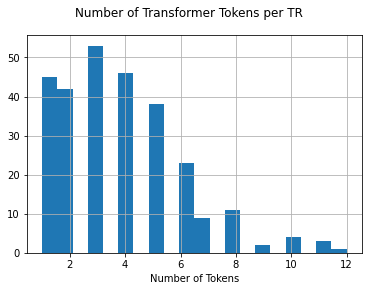

In [182]:
print(foo.stimulus_df.n_transformer_tokens_in_tr.describe())
foo.stimulus_df.n_transformer_tokens_in_tr.hist(bins=20);
plt.suptitle("Number of Transformer Tokens per TR")
plt.xlabel("Number of Tokens");

In [183]:
# Median number of tokens per TR is 5; 75th percentile is 7.
# Assuming we're using about 30 seconds of prior context, that's 20 TRs, so we should take 100-140 context tokens. (yikes-- we've been doing 20!)

N_ATTENTION_TOKENS=20

In [184]:
foo.process_stimulus_attentions(num_window_tokens=N_ATTENTION_TOKENS)

In [185]:
# sns.heatmap(foo.stimulus_df.attentions.iloc[80][0][11],vmin=0, vmax=.5)
# plt.suptitle("Raw Attention ({} Total Tokens)".format(N_ATTENTION_TOKENS));
# import copy
# extracted_df = copy.deepcopy(foo.stimulus_df)

In [186]:
foo.mask_non_tr_attentions()

In [187]:
foo.compute_attention_head_magnitudes(p=1)
# foo.compute_attention_head_magnitudes(p=2)
foo.compute_attention_head_magnitudes(p='inf')

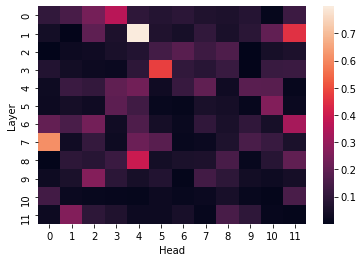

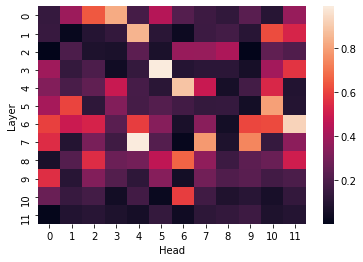

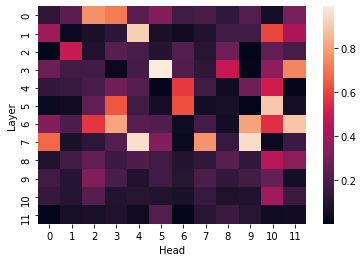

In [189]:
for x in [50, 90, 120]:
    plt.figure()
    sns.heatmap(foo.stimulus_df.attention_heads_Linf.iloc[x])
    plt.xlabel("Head")
    plt.ylabel("Layer")

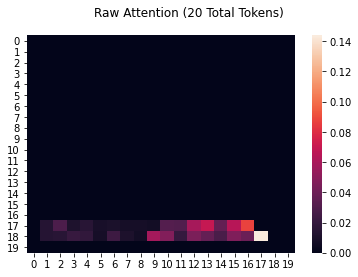

In [190]:
sns.heatmap(foo.stimulus_df.attentions.iloc[80][0][11])
plt.suptitle("Raw Attention ({} Total Tokens)".format(N_ATTENTION_TOKENS));

In [191]:
foo.stimulus_df.columns

Index(['tr', 'start_ts', 'end_ts', 'tr.1', 'tokens', 'n_tokens', 'tr_shift',
       'prev_tr', 'attentions', 'attentions_transformer_tokens', 'activations',
       'transformer_tokens_in_tr', 'n_transformer_tokens_in_tr',
       'masked_attentions', 'attention_heads_L1', 'attention_heads_Linf'],
      dtype='object')

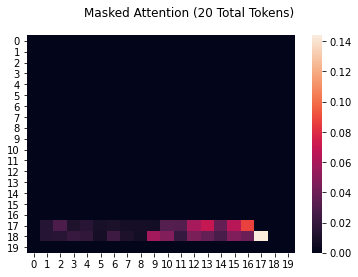

In [192]:
sns.heatmap(foo.stimulus_df.masked_attentions.iloc[80][0][11])
plt.suptitle("Masked Attention ({} Total Tokens)".format(N_ATTENTION_TOKENS));

In [193]:
foo.compute_attention_head_distances()

Processing TR 0.
Processing TR 100.
Processing TR 200.


In [194]:
foo.stimulus_df.attention_distances

0                                                   None
1                                                   None
2                                                   None
3                                                   None
4      [[28.224779192358255, 28.845387047855183, 5.64...
                             ...                        
272    [[7.4454806093126535, 7.457689435686916, 2.674...
273    [[34.30736210849136, 28.912573788315058, 6.738...
274    [[28.163402006030083, 27.426311824820004, 6.64...
275    [[28.43867607228458, 28.160190001828596, 6.924...
276    [[21.02773510850966, 24.19530450180173, 4.6136...
Name: attention_distances, Length: 277, dtype: object

<AxesSubplot:>

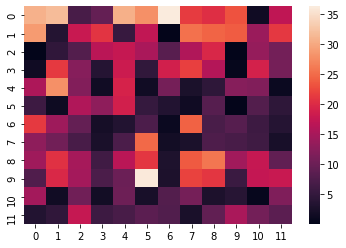

In [206]:
sns.heatmap(foo.stimulus_df.attention_distances.iloc[45])

In [204]:
foo.compute_attention_head_distances_fast()

Processing TR 0.
Processing TR 100.
Processing TR 200.


<AxesSubplot:>

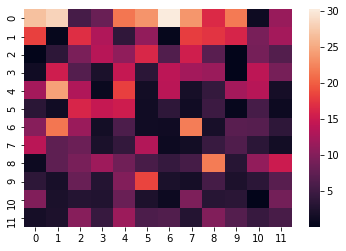

In [213]:
sns.heatmap(foo.stimulus_df.attention_distances_fast.iloc[20])

<AxesSubplot:>

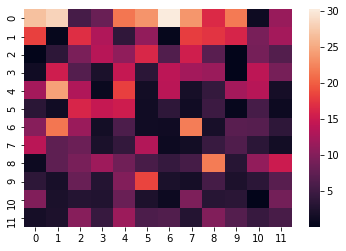

In [214]:
sns.heatmap(foo.stimulus_df.attention_distances.iloc[20])

In [202]:
N_TOKENS = 5

a = np.array(range(1,N_TOKENS+1))

columns = np.tile(a,(N_TOKENS,1))
rows = np.tile(a,(N_TOKENS,1)).T

(rows-columns).clip(min=0).shape[0]

5

# Outputs for Sreejan

In [71]:
import itertools

def flatten(lists):
    if lists is None:
        return None
    else:
        return list(itertools.chain.from_iterable(lists))

### Syntactic Complexity

In [74]:
p=1 # 1, 2, inf

COMPLEXITY_OUTPUT_FILE = "{}_{}_syntactic_complexity_L-{}_T-{}.npy".format(STIMULUS, MODEL, p, N_ATTENTION_TOKENS)
print("Outputting metrics to {}".format(COMPLEXITY_OUTPUT_FILE))

attention_vectors = foo.stimulus_df["attention_heads_L{}".format(p)].apply(lambda x: flatten(x))

attention_np_arrays = np.array(attention_vectors)
print(attention_np_arrays.shape)
np.save(COMPLEXITY_OUTPUT_FILE, attention_np_arrays)

# baz = np.load(OUTPUT_FILE, allow_pickle=True)
# baz[:10]

Outputting metrics to black_bert-base-uncased_syntactic_complexity_L-1_T-20.npy
(534,)


### Syntactic Distance

In [73]:
DISTANCE_OUTPUT_FILE = "{}_{}_syntactic_distance_T-{}.npy".format(STIMULUS, MODEL, N_ATTENTION_TOKENS)

attention_distance_vectors = foo.stimulus_df["attention_distances".format(p)].apply(lambda x: flatten(x))
attention_np_arrays = np.array(attention_distance_vectors)
print(attention_np_arrays.shape)

np.save(DISTANCE_OUTPUT_FILE, attention_np_arrays)

# baz = np.load(DISTANCE_OUTPUT_FILE, allow_pickle=True)
# baz

(534,)


# Semantic Composition

(F.K.A "Attention Effects")

### End-to-end
How far do tokens "move in space" from the initial embeddings to final outputs?

`activation_end_to_end_l2_distances[n_token]` gives the start-to-finish displacement of the contextualization process. Longer distances indicates the token's meaning was changed more during contextualization.

In [92]:
foo.end_to_end_token_movement()

def normalize_col(col):
    
    de_meaned = col - col.mean()
    return de_meaned / de_meaned.std()

foo.stimulus_df["activation_end_to_end_mean_l2"] = foo.stimulus_df["activation_end_to_end_l2_distances"].apply(lambda x: np.mean(x))
foo.stimulus_df["activation_end_to_end_max_l2"] = foo.stimulus_df["activation_end_to_end_l2_distances"].apply(lambda x: np.max(x))

foo.stimulus_df.activation_end_to_end_mean_l2 = normalize_col(foo.stimulus_df.activation_end_to_end_mean_l2)
foo.stimulus_df.activation_end_to_end_max_l2 = normalize_col(foo.stimulus_df.activation_end_to_end_max_l2)

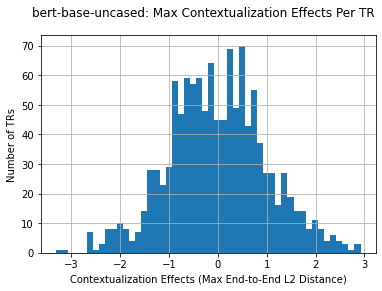

In [36]:
foo.stimulus_df.activation_end_to_end_max_l2.hist(bins=50)
plt.suptitle("{}: Max Contextualization Effects Per TR".format(foo.model_name));
plt.xlabel("Contextualization Effects (Max End-to-End L2 Distance)")
plt.ylabel("Number of TRs");

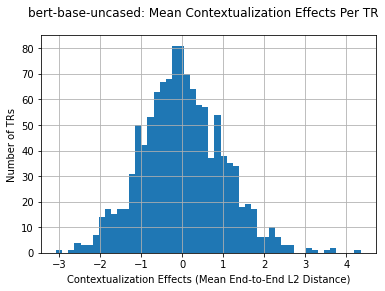

In [37]:
foo.stimulus_df.activation_end_to_end_mean_l2.hist(bins=50)
plt.suptitle("{}: Mean Contextualization Effects Per TR".format(foo.model_name));
plt.xlabel("Contextualization Effects (Mean End-to-End L2 Distance)")
plt.ylabel("Number of TRs");

# Semantic Composition Output
### Outputting Layerwise Token Movement 
`activation_layerwise_l2_distances[n_layer][n_token]` gives the L2 distance that each token moved, each layer.

We can look at the mean or max distance for each layer + token.

### Run the embeddings with a defined number of context windows

In [124]:
N_CONTEXT_TRS = 100

foo.process_stimulus_activations(num_context_trs=N_CONTEXT_TRS)
foo.layerwise_token_movement()
foo.end_to_end_token_movement()

Token indices sequence length is longer than the specified maximum sequence length for this model (516 > 512). Running this sequence through the model will result in indexing errors


IndexError: index out of range in self

In [ ]:
def normalize_col(col):
    
    de_meaned = col - col.mean()
    return de_meaned / de_meaned.std()

end_to_end_mean_l2 = foo.stimulus_df["activation_end_to_end_l2_distances"].apply(lambda x: np.mean(x))
foo.stimulus_df["activation_end_to_end_mean_l2_normed"] = normalize_col(end_to_end_mean_l2)

end_to_end_max_l2 = foo.stimulus_df["activation_end_to_end_l2_distances"].apply(lambda x: np.max(x))
foo.stimulus_df["activation_end_to_end_max_l2_normed"] = normalize_col(end_to_end_max_l2)

In [ ]:
foo.stimulus_df.columns

In [ ]:
layerwise_mean_l2 = foo.stimulus_df["activation_layerwise_l2_distances"].apply(lambda x: [np.mean(layer) for layer in x])
foo.stimulus_df["activation_layerwise_mean_l2"] = layerwise_mean_l2

layerwise_max_l2 = foo.stimulus_df["activation_layerwise_l2_distances"].apply(lambda x: [np.max(layer) for layer in x])
foo.stimulus_df["activation_layerwise_max_l2"] = layerwise_max_l2

len(foo.stimulus_df["activation_layerwise_l2_distances"][0][0])

### Sanity Checks
--token movement in one TR  
--statistics of token movement across all TRs

In [ ]:
test = foo.stimulus_df.iloc[30]
print(test.transformer_tokens_in_tr)

plt.plot(test["activation_layerwise_mean_l2"], label="Mean L2 Distance")
plt.plot(test["activation_layerwise_max_l2"], label="Max L2 Distance")
plt.xlabel("Transformer Layer")
plt.ylabel("L2 Distance Before/After")
plt.legend(loc='best')
plt.suptitle("Contextualization: Token Movement Across Layers");

In [ ]:
metric_to_check = "max" # mean, max
df = pd.DataFrame.from_records(foo.stimulus_df["activation_layerwise_{}_l2".format(metric_to_check)])

df.apply(np.mean).plot(kind='bar',yerr=df.apply(np.std))
plt.suptitle("Mean / Std of {} L2 Displacement Across Layers\n {}, {}".format(metric_to_check, STIMULUS, MODEL));

In [ ]:
for metric in ["max", "mean"]:

    df = pd.DataFrame.from_records(foo.stimulus_df["activation_layerwise_{}_l2".format(metric)])

    normalized = (df-df.mean())/df.std()
    normalized.apply([np.mean, np.std])
    foo.stimulus_df["activation_layerwise_{}_l2_normed".format(metric)] = [list(r) for r in normalized.to_records(index=False)]

In [ ]:
full_lists = []
for i, tr in foo.stimulus_df.iterrows():
    
    max_composition = tr["activation_layerwise_max_l2_normed"] + [tr['activation_end_to_end_max_l2_normed']]
    mean_composition = tr["activation_layerwise_mean_l2_normed"] + [tr['activation_end_to_end_mean_l2_normed']]
    full_lists.append(max_composition + mean_composition)
    
foo.stimulus_df["full_semantic_composition"] = full_lists

### Sanity-check dimensions
We should have N_TRs x 2 x N_LAYER+1:

In [ ]:
print(foo.stimulus_df["full_semantic_composition"].shape)
print(len(foo.stimulus_df["full_semantic_composition"][0]))

## Final Semantic Composition .npy write

In [ ]:
attention_effects_array = np.array(foo.stimulus_df[['full_semantic_composition']])

np.save("{}_{}_semantic_composition_{}-TRs.npy".format(STIMULUS, MODEL, N_CONTEXT_TRS), attention_effects_array)

In [ ]:
foo.stimulus_df.full_semantic_composition

# RSMs

In [ ]:
non_null = for_output[~pd.isnull(for_output["attention_heads_L{}_vector".format(p)])]

non_null_df = pd.DataFrame.from_records(non_null["attention_heads_L{}_vector".format(p)].values)

rsm_df = pd.DataFrame(np.corrcoef(non_null_df))

plt.figure(figsize=(8,8))
sns.heatmap(rsm_df)
plt.suptitle("RSM for L-inf norm on attention heads");

<AxesSubplot:>

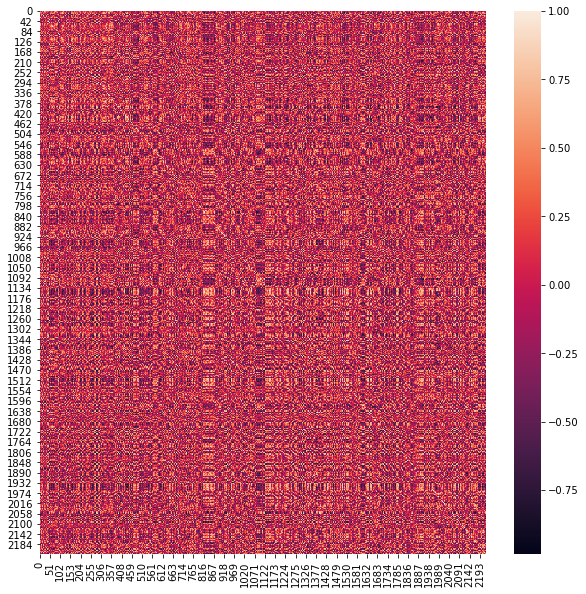

In [68]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.DataFrame(np.corrcoef(normalized)))

### To upload to PNI

```scp {FILE_NAME} tsumers@apps.pni.princeton.edu:/jukebox/griffiths/bert-brains/code/bert-brains/data/{STIMULUS}/{MODEL}/syntactic_analyses```

```ssh tsumers@apps.pni.princeton.edu```

In [126]:
ALL_SYNTAX_REPS = "scp {}_*_syntactic_*.npy {}_*_semantic_*.npy tsumers@apps.pni.princeton.edu:/jukebox/griffiths/bert-brains/code/bert-brains/data/{}/{}/syntactic_analyses"

print("SCP all syntactic representations to PNI:\n")
print(ALL_SYNTAX_REPS.format(STIMULUS, STIMULUS, STIMULUS, MODEL))

SCP all syntactic representations to PNI:

scp black_*_syntactic_*.npy black_*_semantic_*.npy tsumers@apps.pni.princeton.edu:/jukebox/griffiths/bert-brains/code/bert-brains/data/black/bert-base-uncased/syntactic_analyses


In [127]:
ALL_LAYER_REPS = "scp {}_{}_layer_*_activations.npy tsumers@apps.pni.princeton.edu:/jukebox/griffiths/bert-brains/code/bert-brains/data/{}/{}/raw_embeddings"

print("SCP all model layers to PNI:\n")

print(ALL_LAYER_REPS.format(STIMULUS, MODEL, STIMULUS, MODEL))

SCP all model layers to PNI:

scp black_bert-base-uncased_layer_*_activations.npy tsumers@apps.pni.princeton.edu:/jukebox/griffiths/bert-brains/code/bert-brains/data/black/bert-base-uncased/raw_embeddings
